# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# pip install citipy

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from pprint import pprint
import datetime #https://tecadmin.net/get-current-date-time-python/

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = url + "appid=" + api_key +"&units=" + units + "&q="

In [80]:
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

Set = 1
Count = 1

# source of round up: https://stackoverflow.com/questions/2356501/how-do-you-round-up-a-number-in-python
Max_Set = -(-len(cities)//20)
print(Max_Set)

29


In [82]:
for city in cities:
    print(f"Processing Record {Count} of Set {Set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        if response.get("name") == None:
            pass
        else:
            City.append(response.get("name"))
        Cloudiness.append(response.get("clouds").get("all"))
        Country.append(response.get("sys").get("country"))
        Date.append(response.get("dt"))
        Humidity.append(response.get("main").get("humidity"))
        Lat.append(response.get("coord").get("lat"))
        Lng.append(response.get("coord").get("lon"))
        Max_Temp.append(response.get("main").get("temp_max"))
        Wind_Speed.append(response.get("wind").get("speed"))
    except (KeyError, IndexError, AttributeError):
        print("City not found. Skipping...")
    
    
    if Count % 20 == 0: #https://www.pythoncentral.io/using-python-to-check-for-odd-or-even-numbers/
        Set = Set + 1
        time.sleep(60)  #https://stackoverflow.com/questions/24409861/tell-python-to-wait-pause-a-for-loop
                        #http://www.pressthered.com/how_to_sleep_pause_wait_stop_your_python_code/
    Count = Count + 1

Processing Record 1 of Set 1 | amderma
City not found. Skipping...
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | vostok
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | narsaq
Processing Record 7 of Set 1 | kruisfontein
Processing Record 8 of Set 1 | isangel
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | diu
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | brownsville
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | sataua
City not found. Skipping...
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | laurentides
Processing Record 20 of Set 1 | bakaly
Processing Record 21 of Set 2 | iqaluit
Processing Record 22 of Set 2 | yuancheng
City not found. Skipp

Processing Record 183 of Set 10 | terrace bay
Processing Record 184 of Set 10 | nyurba
Processing Record 185 of Set 10 | vila velha
Processing Record 186 of Set 10 | bethel
Processing Record 187 of Set 10 | uvarovka
Processing Record 188 of Set 10 | omboue
Processing Record 189 of Set 10 | ericeira
Processing Record 190 of Set 10 | bambous virieux
Processing Record 191 of Set 10 | buturlinovka
Processing Record 192 of Set 10 | hofn
Processing Record 193 of Set 10 | alice springs
Processing Record 194 of Set 10 | chengmai
City not found. Skipping...
Processing Record 195 of Set 10 | sao filipe
Processing Record 196 of Set 10 | talnakh
Processing Record 197 of Set 10 | cherskiy
Processing Record 198 of Set 10 | oranmore
Processing Record 199 of Set 10 | hasaki
Processing Record 200 of Set 10 | shimoda
Processing Record 201 of Set 11 | cabra
Processing Record 202 of Set 11 | ust-tsilma
Processing Record 203 of Set 11 | rengo
Processing Record 204 of Set 11 | thompson
Processing Record 205

Processing Record 361 of Set 19 | nizwa
Processing Record 362 of Set 19 | kamennogorsk
Processing Record 363 of Set 19 | portland
Processing Record 364 of Set 19 | kokopo
Processing Record 365 of Set 19 | peniche
Processing Record 366 of Set 19 | nizhnevartovsk
Processing Record 367 of Set 19 | sentyabrskiy
City not found. Skipping...
Processing Record 368 of Set 19 | mantua
Processing Record 369 of Set 19 | isla mujeres
Processing Record 370 of Set 19 | ust-kuyga
Processing Record 371 of Set 19 | ukiah
Processing Record 372 of Set 19 | souillac
Processing Record 373 of Set 19 | soyo
Processing Record 374 of Set 19 | launceston
Processing Record 375 of Set 19 | chapaevsk
Processing Record 376 of Set 19 | loei
Processing Record 377 of Set 19 | dzidzantun
Processing Record 378 of Set 19 | mouzakion
City not found. Skipping...
Processing Record 379 of Set 19 | ust-nera
Processing Record 380 of Set 19 | aykhal
Processing Record 381 of Set 20 | silae
Processing Record 382 of Set 20 | ternat

Processing Record 539 of Set 27 | menongue
Processing Record 540 of Set 27 | san policarpo
Processing Record 541 of Set 28 | tweed
Processing Record 542 of Set 28 | pemangkat
City not found. Skipping...
Processing Record 543 of Set 28 | cooma
Processing Record 544 of Set 28 | kiunga
Processing Record 545 of Set 28 | merrill
Processing Record 546 of Set 28 | penzance
Processing Record 547 of Set 28 | lemesos
City not found. Skipping...
Processing Record 548 of Set 28 | mabaruma
Processing Record 549 of Set 28 | avera
Processing Record 550 of Set 28 | lasa
Processing Record 551 of Set 28 | krasnoselkup
City not found. Skipping...
Processing Record 552 of Set 28 | yulara
Processing Record 553 of Set 28 | grindavik
Processing Record 554 of Set 28 | biltine
Processing Record 555 of Set 28 | dawson creek
Processing Record 556 of Set 28 | new ulm
Processing Record 557 of Set 28 | himora
City not found. Skipping...
Processing Record 558 of Set 28 | whitecourt
Processing Record 559 of Set 28 | 

In [76]:
#testing out new info on get syntax learned from https://www.tutorialspoint.com/python/dictionary_get.htm and https://www.reddit.com/r/learnpython/comments/7imfch/how_do_i_grab_a_specific_piece_of_data_out_of_a/
# city_name_country = []
# city_name = "sembe"
# response = requests.get(query_url + city_name).json()
# testing = 0
# if response.get("name") == None :
#     pass
# else:
#     testing = response.get("name")
# print(testing)

# city_name_country.append(response.get("sys", {}).get("country")) 
# print(city_name_country)

0


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [101]:
# print(len(City))
# print(len(Cloudiness))
# print(len(Country))
# print(len(Date))
# print(len(Humidity))
# print(len(Lat))
# print(len(Lng))
# print(len(Max_Temp))
# print(len(Wind_Speed))
# Cities = City
# while None in Cities: Cities.remove(None)
# print(Cities)
# len(Cities)

weather = {"City" : City,
          "Cloudiness" : Cloudiness,
          "Country" : Country,
          "Date" : Date,
          "Humidity" : Humidity,
          "Lat" : Lat,
          "Lng" : Lng,
          "Max Temp" : Max_Temp,
          "Wind Speed" : Wind_Speed}

weather_df = pd.DataFrame(weather)
weather_df.to_csv(os.path.join("Output_Data","Cities.csv"), index = False)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,79,IN,1573963230,73,15.34,74.49,73.40,3.36
1,Anadyr,40,RU,1573963230,85,64.73,177.51,14.00,4.47
2,Vostok,67,RU,1573963230,67,46.45,135.83,13.64,4.70
3,Nikolskoye,90,RU,1573963230,93,59.70,30.79,37.99,8.95
4,Narsaq,100,GL,1573963230,40,60.91,-46.05,37.40,42.50


In [85]:
weather_df.count()

City          518
Cloudiness    518
Country       518
Date          518
Humidity      518
Lat           518
Lng           518
Max Temp      518
Wind Speed    518
dtype: int64

In [95]:
currentDT = datetime.date.today().strftime("%m/%d/%Y")
print(currentDT)

11/16/2019


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

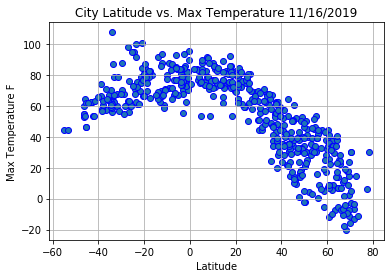

In [97]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", edgecolors='b')
plt.title(f"City Latitude vs. Max Temperature {currentDT}")
plt.ylabel("Max Temperature F")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Data/City Latitude vs. Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

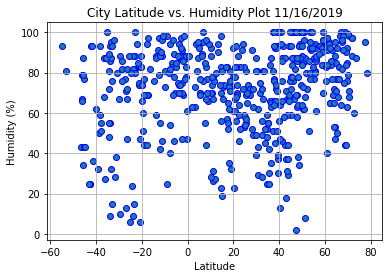

In [98]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", edgecolors='b')
plt.title(f"City Latitude vs. Humidity Plot {currentDT}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Data/City Latitude vs. Humidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

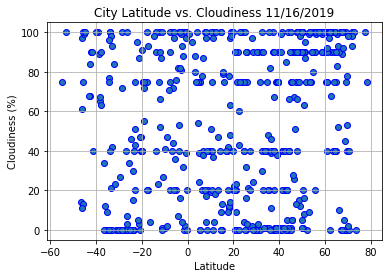

In [99]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", edgecolors='b')
plt.title(f"City Latitude vs. Cloudiness {currentDT}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Data/City Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

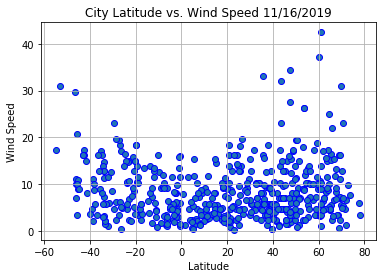

In [100]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", edgecolors='b')
plt.title(f"City Latitude vs. Wind Speed {currentDT}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Data/City Latitude vs. Wind Speed.png")
plt.show()